###Importing Modules


In [136]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


###Data Loading

In [137]:
categories = ["rec.sport.baseball", "rec.sport.hockey", "talk.politics.guns", "talk.politics.mideast","talk.politics.misc" ]

data = fetch_20newsgroups(subset="all", categories=categories, remove=("headers","footers","quotes"))

In [138]:
list(data.target_names)

['rec.sport.baseball',
 'rec.sport.hockey',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc']

In [139]:
texts = data.data
labels = []
for t in data.target:
    if t in [0,1]:
        labels.append("sport")
    else:
        labels.append("politics")

In [140]:
len(texts)

4618

In [141]:
len(labels)

4618

In [142]:
labels_series = pd.Series(labels)
class_counts = labels_series.value_counts()

print("Class-wise document counts:")
print(class_counts)


Class-wise document counts:
politics    2625
sport       1993
Name: count, dtype: int64


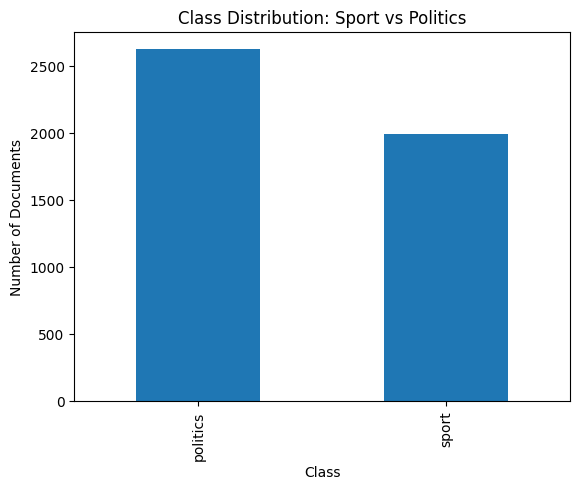

In [143]:
class_counts.plot(kind="bar")
plt.title("Class Distribution: Sport vs Politics")
plt.xlabel("Class")
plt.ylabel("Number of Documents")
plt.show()


###Text Pre-processing

In [144]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = re.sub(r"\S+@\S+", " ", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text)

    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    tokens = [stemmer.stem(t) for t in tokens]

    return " ".join(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [145]:
texts = [clean_text(t) for t in texts]

###Train-test split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels)

In [147]:
print("Train size",len(X_train))
print("Test size",len(X_test))

Train size 3694
Test size 924


##Feature engineering: BoW

In [148]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(
    stop_words="english",
    max_df=0.9,
    min_df=5
)

X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)


###Multinomial Naive Bayes

In [149]:
naive_bayes_bow = MultinomialNB()
naive_bayes_bow.fit(X_train_bow, y_train)

nb_bow_preds = naive_bayes_bow.predict(X_test_bow)

accuracy_nb_bow = accuracy_score(y_test, nb_bow_preds)
precision_nb_bow = precision_score(y_test, nb_bow_preds, pos_label="sport")
recall_nb_bow = recall_score(y_test, nb_bow_preds, pos_label="sport")
f1_nb_bow = f1_score(y_test, nb_bow_preds, pos_label="sport")

print(f"Naive Bayes + BoW Precision : {precision_nb_bow:.3f}")
print(f"Naive Bayes + BoW Recall    : {recall_nb_bow:.3f}")
print(f"Naive Bayes + BoW F1-score  : {f1_nb_bow:.3f}")
print(f"Naive bayes + BoW Accuracy {accuracy_nb_bow:.3f} ")


Naive Bayes + BoW Precision : 0.963
Naive Bayes + BoW Recall    : 0.912
Naive Bayes + BoW F1-score  : 0.937
Naive bayes + BoW Accuracy 0.947 


###Logistic Regression

In [150]:
log_reg_bow = LogisticRegression(max_iter=1000)
log_reg_bow.fit(X_train_bow, y_train)

lr_bow_preds = log_reg_bow.predict(X_test_bow)
accuracy_lr_bow = accuracy_score(y_test, lr_bow_preds)
precision_lr_bow = precision_score(y_test, lr_bow_preds, pos_label="sport")
recall_lr_bow = recall_score(y_test, lr_bow_preds, pos_label="sport")
f1_lr_bow = f1_score(y_test, lr_bow_preds, pos_label="sport")

print(f"Logistic Regression + BoW Accuracy  : {accuracy_lr_bow:.3f} ")
print(f"Logistic Regression + BoW Precision : {precision_lr_bow:.3f}")
print(f"Logistic Regression + BoW Recall    : {recall_lr_bow:.3f}")
print(f"Logistic Regression + BoW F1-score  : {f1_lr_bow:.3f}")


Logistic Regression + BoW Accuracy  : 0.927 
Logistic Regression + BoW Precision : 0.951
Logistic Regression + BoW Recall    : 0.877
Logistic Regression + BoW F1-score  : 0.913


###Support Vector Machine

In [151]:
svm_bow = LinearSVC()
svm_bow.fit(X_train_bow, y_train)

svm_bow_preds = svm_bow.predict(X_test_bow)
accuracy_svm_bow = accuracy_score(y_test, svm_bow_preds)
precision_svm_bow = precision_score(y_test, svm_bow_preds, pos_label="sport")
recall_svm_bow = recall_score(y_test, svm_bow_preds, pos_label="sport")
f1_svm_bow = f1_score(y_test, svm_bow_preds, pos_label="sport")

print(f"SVM + BoW Accuracy  : {accuracy_svm_bow:.3f} ")
print(f"SVM + BoW Precision : {precision_svm_bow:.3f}")
print(f"SVM + BoW Recall    : {recall_svm_bow:.3f}")
print(f"SVM + BoW F1-score  : {f1_svm_bow:.3f}")


SVM + BoW Accuracy  : 0.905 
SVM + BoW Precision : 0.917
SVM + BoW Recall    : 0.857
SVM + BoW F1-score  : 0.886


##TF-IDF

In [152]:
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

###Multinomial Naive Bayes

In [153]:
print("\nMultinomial Naive Bayes + TF-IDF")

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

nb_tfidf_preds = naive_bayes.predict(X_test_tfidf)

accuracy_nb_tfidf = accuracy_score(y_test, nb_tfidf_preds)
precision_nb_tfidf = precision_score(y_test, nb_tfidf_preds, pos_label="sport")
recall_nb_tfidf = recall_score(y_test, nb_tfidf_preds, pos_label="sport")
f1_nb_tfidf = f1_score(y_test, nb_tfidf_preds, pos_label="sport")

print(f"Naive Bayes + TF-IDF Accuracy  : {accuracy_nb_tfidf:.3f} ")
print(f"Naive Bayes + TF-IDF Precision : {precision_nb_tfidf:.3f}")
print(f"Naive Bayes + TF-IDF Recall    : {recall_nb_tfidf:.3f}")
print(f"Naive Bayes + TF-IDF F1-score  : {f1_nb_tfidf:.3f}")



Multinomial Naive Bayes + TF-IDF
Naive Bayes + TF-IDF Accuracy  : 0.932 
Naive Bayes + TF-IDF Precision : 0.997
Naive Bayes + TF-IDF Recall    : 0.845
Naive Bayes + TF-IDF F1-score  : 0.915


###Logistic Regression

In [154]:
print("\nLogistic Regression + TF-IDF")

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)

lr_tfidf_preds = log_reg.predict(X_test_tfidf)

accuracy_lr_tfidf = accuracy_score(y_test, lr_tfidf_preds)
precision_lr_tfidf = precision_score(y_test, lr_tfidf_preds, pos_label="sport")
recall_lr_tfidf = recall_score(y_test, lr_tfidf_preds, pos_label="sport")
f1_lr_tfidf = f1_score(y_test, lr_tfidf_preds, pos_label="sport")

print(f"Logistic Regression + TF-IDF Accuracy  : {accuracy_lr_tfidf:.3f} ")
print(f"Logistic Regression + TF-IDF Precision : {precision_lr_tfidf:.3f}")
print(f"Logistic Regression + TF-IDF Recall    : {recall_lr_tfidf:.3f}")
print(f"Logistic Regression + TF-IDF F1-score  : {f1_lr_tfidf:.3f}")



Logistic Regression + TF-IDF
Logistic Regression + TF-IDF Accuracy  : 0.934 
Logistic Regression + TF-IDF Precision : 0.991
Logistic Regression + TF-IDF Recall    : 0.855
Logistic Regression + TF-IDF F1-score  : 0.918


###Support Vector Machine

In [155]:
print("\nSupport Vector Machine + TF-IDF")

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

svm_tfidf_preds = svm_model.predict(X_test_tfidf)

accuracy_svm_tfidf = accuracy_score(y_test, svm_tfidf_preds)
precision_svm_tfidf = precision_score(y_test, svm_tfidf_preds, pos_label="sport")
recall_svm_tfidf = recall_score(y_test, svm_tfidf_preds, pos_label="sport")
f1_svm_tfidf = f1_score(y_test, svm_tfidf_preds, pos_label="sport")

print(f"SVM + TF-IDF Accuracy  : {accuracy_svm_tfidf:.3f} ")
print(f"SVM + TF-IDF Precision : {precision_svm_tfidf:.3f}")
print(f"SVM + TF-IDF Recall    : {recall_svm_tfidf:.3f}")
print(f"SVM + TF-IDF F1-score  : {f1_svm_tfidf:.3f}")



Support Vector Machine + TF-IDF
SVM + TF-IDF Accuracy  : 0.944 
SVM + TF-IDF Precision : 0.978
SVM + TF-IDF Recall    : 0.890
SVM + TF-IDF F1-score  : 0.932


##TF-IDF (N- Gram)

In [156]:
tfidf_ngram = TfidfVectorizer(
    stop_words="english",
    ngram_range=(1,2),
    max_df=0.9,
    min_df=5
)

X_train_tfidf_ngram = tfidf_ngram.fit_transform(X_train)
X_test_tfidf_ngram = tfidf_ngram.transform(X_test)


###Multinomial Naive Bayes

In [157]:
print("\nMultinomial Naive Bayes + TF-IDF (N-gram)")

nb_ngram = MultinomialNB()
nb_ngram.fit(X_train_tfidf_ngram, y_train)

nb_ngram_preds = nb_ngram.predict(X_test_tfidf_ngram)

accuracy_nb_ngram = accuracy_score(y_test, nb_ngram_preds)
precision_nb_ngram = precision_score(y_test, nb_ngram_preds, pos_label="sport")
recall_nb_ngram = recall_score(y_test, nb_ngram_preds, pos_label="sport")
f1_nb_ngram = f1_score(y_test, nb_ngram_preds, pos_label="sport")

print(f"Naive Bayes + TF-IDF (N-gram) Accuracy  : {accuracy_nb_ngram:.3f} ")
print(f"Naive Bayes + TF-IDF (N-gram) Precision : {precision_nb_ngram:.3f}")
print(f"Naive Bayes + TF-IDF (N-gram) Recall    : {recall_nb_ngram:.3f}")
print(f"Naive Bayes + TF-IDF (N-gram) F1-score  : {f1_nb_ngram:.3f}")



Multinomial Naive Bayes + TF-IDF (N-gram)
Naive Bayes + TF-IDF (N-gram) Accuracy  : 0.940 
Naive Bayes + TF-IDF (N-gram) Precision : 0.991
Naive Bayes + TF-IDF (N-gram) Recall    : 0.870
Naive Bayes + TF-IDF (N-gram) F1-score  : 0.927


###Logistic Regression

In [158]:
print("\nLogistic Regression + TF-IDF (N-gram)")

lr_ngram = LogisticRegression(max_iter=1000)
lr_ngram.fit(X_train_tfidf_ngram, y_train)

lr_ngram_preds = lr_ngram.predict(X_test_tfidf_ngram)

accuracy_lr_ngram = accuracy_score(y_test, lr_ngram_preds)
precision_lr_ngram = precision_score(y_test, lr_ngram_preds, pos_label="sport")
recall_lr_ngram = recall_score(y_test, lr_ngram_preds, pos_label="sport")
f1_lr_ngram = f1_score(y_test, lr_ngram_preds, pos_label="sport")

print(f"Logistic Regression + TF-IDF (N-gram) Accuracy  : {accuracy_lr_ngram:.3f} ")
print(f"Logistic Regression + TF-IDF (N-gram) Precision : {precision_lr_ngram:.3f}")
print(f"Logistic Regression + TF-IDF (N-gram) Recall    : {recall_lr_ngram:.3f}")
print(f"Logistic Regression + TF-IDF (N-gram) F1-score  : {f1_lr_ngram:.3f}")



Logistic Regression + TF-IDF (N-gram)
Logistic Regression + TF-IDF (N-gram) Accuracy  : 0.933 
Logistic Regression + TF-IDF (N-gram) Precision : 0.991
Logistic Regression + TF-IDF (N-gram) Recall    : 0.852
Logistic Regression + TF-IDF (N-gram) F1-score  : 0.916


###Support Vector Machine

In [159]:
print("\nSupport Vector Machine + TF-IDF (N-gram)")

svm_ngram = LinearSVC()
svm_ngram.fit(X_train_tfidf_ngram, y_train)

svm_ngram_preds = svm_ngram.predict(X_test_tfidf_ngram)

accuracy_svm_ngram = accuracy_score(y_test, svm_ngram_preds)
precision_svm_ngram = precision_score(y_test, svm_ngram_preds, pos_label="sport")
recall_svm_ngram = recall_score(y_test, svm_ngram_preds, pos_label="sport")
f1_svm_ngram = f1_score(y_test, svm_ngram_preds, pos_label="sport")

print(f"SVM + TF-IDF (N-gram) Accuracy  : {accuracy_svm_ngram:.3f} ")
print(f"SVM + TF-IDF (N-gram) Precision : {precision_svm_ngram:.3f}")
print(f"SVM + TF-IDF (N-gram) Recall    : {recall_svm_ngram:.3f}")
print(f"SVM + TF-IDF (N-gram) F1-score  : {f1_svm_ngram:.3f}")



Support Vector Machine + TF-IDF (N-gram)
SVM + TF-IDF (N-gram) Accuracy  : 0.936 
SVM + TF-IDF (N-gram) Precision : 0.975
SVM + TF-IDF (N-gram) Recall    : 0.875
SVM + TF-IDF (N-gram) F1-score  : 0.922
